# Contents

-    [1. Visualization of skull stripping results](#1)    
                              
-    [2. Visualization example for rescaling](#2)    

-    [3. Visualization of Statistical Proccess ](#3)         
        [3.1 Table for parameters' numbers change after each analysis](#3.1) 
        [3.2 Visualization of MRC analysis](#3.2) 

-    [4. Visualization of Suspected Epileptic Foci  ](#4) 

-    [5. Visualization of true/false positives ](#5) 

-    [6. Compare estimated EF coordinates between parameters ](#6)


In [1]:
import os
import numpy as np
import nibabel as nib
import pandas as pd
import matplotlib as mpl
import seaborn as sns

In [2]:
from ipynb.fs.full.visualization_helper_functions import *
from ipynb.fs.full.project_helper_functions_classes import create_folder

<a name='1'></a>
## 1. Visualization of skull stripping results

In [3]:
case_file = 'case1.nii.gz'
case_folder = 't1_tra'
situation = 'controls'
original_data_folder = 'data/ordered_data'
stripped_data_folder = 'data/stripped_data'

## specify original case file path
original_case_file = os.path.join(original_data_folder, situation, case_folder, case_file)
original_case_data = nib.load(original_case_file)
original_array = original_case_data.get_fdata() 

## specify stripped case file path
stripped_case_file = os.path.join(stripped_data_folder, situation, case_folder, case_file)
stripped_case_data = nib.load(stripped_case_file)
stripped_array = stripped_case_data.get_fdata() 

In [4]:
## by changing slice index you can set correct view
explore_3D_array_with_mask(arr = original_array, mask = stripped_array, slice_ind = 2)

interactive(children=(IntSlider(value=12, description='SLICE', max=24), Output()), _dom_classes=('widget-inter…

In [5]:
## by changing slice index you can set correct view
explore_3D_array_with_mask(arr = original_array, mask = stripped_array, slice_ind = 2)

interactive(children=(IntSlider(value=12, description='SLICE', max=24), Output()), _dom_classes=('widget-inter…

For saving figure, add following statements and specify figure path in to the paranthesis:

save_figure = True, figure_path = ''

Example :
figure_original_and_stripped_slice(original_array[:,:,13], stripped_array[:,:,13],
                                  title1 = 'original slice', title2 = 'slice after skull stripping',
                                  save_figure = True, figure_path = 'output/skull_stripped_figure.png')


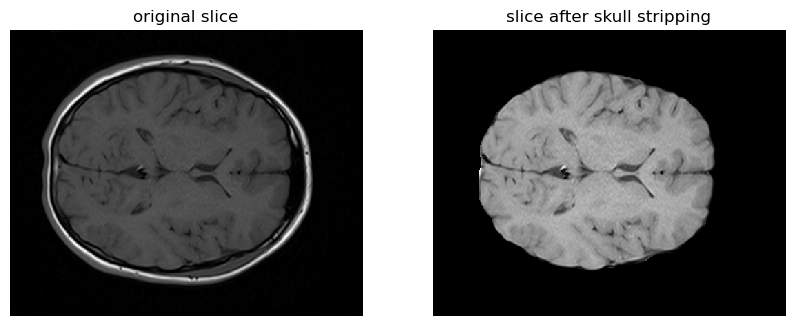

In [6]:
figure_original_and_stripped_slice(original_array[:,:,13], stripped_array[:,:,13],
                                  title1 = 'original slice', title2 = 'slice after skull stripping')

<a name='2'></a>
## 2. Visualization example for rescaling

For saving figure, add following statements and specify figure path in to the paranthesis:

save_figure = True, figure_path = ''

Example :
figure_rescaled_data(stripped_array[:,:,13], rescaled_data[:,:,13], original_array,
                                   title1 = 'stripped slice', title2 = 'rescaled slice',
                                  show_colorbar = True, set_brightness = False,
                                  save_figure = False, figure_path = '.output/rescaled_figure.png')

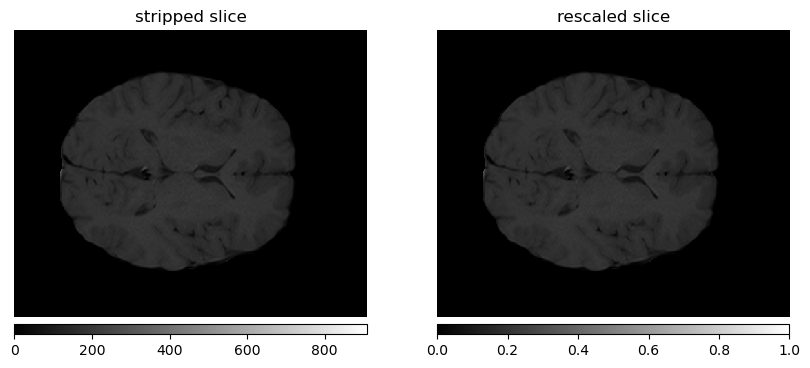

In [7]:
rescaled_data = rescale(stripped_array, np.min(original_array), np.max(original_array))
figure_rescaled_data(stripped_array[:,:,13], rescaled_data[:,:,13], original_array,
                                   title1 = 'stripped slice', title2 = 'rescaled slice',
                                  show_colorbar = True, set_brightness = False)

 <a name='3'></a>
## 3 . Visualization of Statistical Proccess

<a name='3.1'></a>
### 3 .1 Table for parameters' numbers change after each analysis

In [8]:
## specify paths
all_MRC_csv = 'output/MRC_stat_results/auc_values.csv'
all_MRC_collective_csv = 'output/MRC_stat_results/auc_values_collective.csv'
MRC_meaningful_csv = 'output/MRC_stat_results/meaningful_stats.csv'
MRC_meaningful_collective_csv = 'output/MRC_stat_results/meaningful_collective_stats.csv'
MRC_selected = 'output/MRC_stat_results/selected_features.csv'
MRC_collective_selected = 'output/MRC_stat_results/selected_features_coll.csv'
EPE_selected = 'output/EPE_stat_results/EPE_selected_features.csv'

## load data
df0 = pd.read_csv(all_MRC_csv)
df_coll0 = pd.read_csv(all_MRC_collective_csv)
df1 = pd.read_csv(MRC_meaningful_csv)
df_coll1 = pd.read_csv(MRC_meaningful_collective_csv)
df2 = pd.read_csv(MRC_selected)
df_coll2 = pd.read_csv(MRC_collective_selected)
df3 = pd.read_csv(EPE_selected)

In [9]:
columns = ['MRI_type', 'Start', 'MRC_analysis', 'Power_analysis', 'EPE_analysis']
proccess_trace = pd.DataFrame(columns = columns)

MRI_types = df0['MRI_type'].unique()
sequences = df_coll0['sequence'].unique()

for MRI_type in MRI_types:
    start_number = df0['MRI_type'][df0['MRI_type'] == MRI_type].count()
    meaningful_feature_number = df1['MRI_type'][df1['MRI_type'] == MRI_type].count()
    after_power_analysis = df2['MRI_type'][df2['MRI_type'] == MRI_type].count()
    after_EPE = df3['MRI_type'][df3['MRI_type'] == MRI_type].count()
    data = [[MRI_type, start_number, meaningful_feature_number, after_power_analysis, after_EPE]]
    temp_df = pd.DataFrame(data = data, columns = columns)
    proccess_trace = pd.concat([proccess_trace, temp_df])
    
for sequence in sequences:
    start_number = df_coll0['sequence'][df_coll0['sequence'] == sequence].count()
    meaningful_feature_number = df_coll1['sequence'][df_coll1['sequence'] == sequence].count()
    after_power_analysis = df_coll2['sequence'][df_coll2['sequence'] == sequence].count()
    after_EPE = df3['MRI_type'][df3['MRI_type'] == sequence].count()
    data = [[sequence, start_number, meaningful_feature_number, after_power_analysis, after_EPE]]
    temp_df = pd.DataFrame(data = data, columns = columns)
    proccess_trace = pd.concat([proccess_trace, temp_df])
    
## save proccess trace
proccess_trace.to_csv('output/procces_trace_results.csv')


In [10]:
## print MRC analysis feature numbers after per proccess
proccess_trace

,MRI_type,Start,MRC_analysis,Power_analysis,EPE_analysis
0,t1_tra,480,44,37,3
0,t2_cor,480,80,73,0
0,t1_sag,480,30,28,0
0,t2_darkfluid_tra,480,16,13,0
0,t2_tra,480,0,0,0
0,t2,480,139,98,0
0,t1,480,56,47,6


<a name='3.2'></a>
### 3.2 Visualization of MRC analysis

In [11]:
## print MRC analysis feature number and maximum AUC results

MRI_types = df0['MRI_type'].unique()
sequences = df_coll0['sequence'].unique()

for MRI_type in MRI_types:
    meaningful_feature_number = df0['MRI_type'][df0['MRI_type'] == MRI_type].count()
    max_AUC = df0['AUC_value'][df0['MRI_type'] == MRI_type].max()
    print(f" {MRI_type} meaningful feature number :  {meaningful_feature_number},  maximum AUC : {max_AUC}")
    
for sequence in sequences:
    meaningful_feature_number = df_coll0['sequence'][df_coll0['sequence'] == sequence].count()
    max_AUC = df_coll0['AUC_value'][df_coll0['sequence'] == sequence].max()
    print(f" {sequence} meaningful feature number :  {meaningful_feature_number},  maximum AUC : {max_AUC}")

 t1_tra meaningful feature number :  480,  maximum AUC : 0.79
 t2_cor meaningful feature number :  480,  maximum AUC : 0.79
 t1_sag meaningful feature number :  480,  maximum AUC : 0.75
 t2_darkfluid_tra meaningful feature number :  480,  maximum AUC : 0.74
 t2_tra meaningful feature number :  480,  maximum AUC : 0.7
 t2 meaningful feature number :  480,  maximum AUC : 0.81
 t1 meaningful feature number :  480,  maximum AUC : 0.79


In [12]:
# specify MRI data features for creating graph
stat_file_path = 'output/MRC_stat_results/auc_values_collective.csv'
stat_df = pd.read_csv(stat_file_path)
MRI_column_name = 'sequence'
MRI_type = 't1'
shape = 'square'

For saving figure, add following statements and specify figure path in to the paranthesis:

save_figure = True, figure_path = ''

Example :
figure_MRC_AUC_(stat_file_path, MRI_column_name, MRI_type,  shape, save_figure = True, 
                    figure_path = '.output/t2_sequence_circle_MRC_figure.png')


In [ ]:
# create figure
figure_MRC_AUC_(stat_file_path, MRI_column_name, MRI_type,  shape )

<a name='4'></a>
## 4. Visualization of Suspected Epileptic Foci 

In [13]:
stripped_data_folder = 'data/stripped_data'
original_data_folder = 'data/ordered_data'
feature_output_folder = 'output/features'
features_csv_path = 'output/EPE_stat_results/EPE_selected_features.csv'
save_figure = False   ### make at least ones True
overview_all_features = True  ### make at least ones True
feature_ind = 1
sequences_dict = {'t1': ['t1_tra', 't1_sag'], 't2' : ['t2_cor', 't2_tra']}
#prepare folder for saving foci images
foci_image_path = create_folder('output/estimated_foci_images')
reshaped_nifti_files_folder = create_folder('output/reshaped_data')
features_ = pd.read_csv(features_csv_path)

In [ ]:
## for overbiew all features pointed foci 
if overview_all_features:
    for feature_ind in range(0, len(features_)):
        efv = epileptic_focus_visualization(stripped_data_folder = stripped_data_folder,
                        original_data_folder = original_data_folder,
                        feature_output_folder = feature_output_folder,
                        features_csv_path = features_csv_path,
                        feature_ind = feature_ind,
                        sequences = sequences_dict)
        efv.show_figure(save_figure = save_figure,  folder_path = foci_image_path,
                       reshaped_nifti_files_folder = reshaped_nifti_files_folder)

In [ ]:
## for overbiew features seperately
efv = epileptic_focus_visualization(stripped_data_folder = stripped_data_folder,
                original_data_folder = original_data_folder,
                feature_output_folder = feature_output_folder,
                features_csv_path = features_csv_path,
                feature_ind = 2,
                sequences = sequences_dict)
efv.show_figure(save_figure = save_figure,  folder_path = foci_image_path,
               reshaped_nifti_files_folder = reshaped_nifti_files_folder)

<a name='5'></a>
## 5. Visualization of true/false positives

### specifing paths

In [15]:
features_csv_path = 'output/EPE_stat_results/EPE_selected_features.csv'
features_df = pd.read_csv(features_csv_path)
feature_output_folder = 'output/features'
case_info_excel_path = 'output/MRI_informations.xlsx'
control_id = 'controls'
patient_id = 'patients'
sequences_dict = {'t1': ['t1_tra', 't1_sag'], 't2' : ['t2_cor', 't2_tra']}

In [16]:
diagnosis_results =  take_diagnosis_results(features_df, feature_output_folder,
                                            case_info_excel_path, control_id, patient_id,
                                           sequences_dict = sequences_dict)


In [17]:
## set parameters as parameter set to be more understandible
diagnosis_results_columns = diagnosis_results.columns
diagnosis_results_columns = ['ParameterSet'+col.split('parameter')[-1] if 'param' in col else col for col in diagnosis_results_columns]
diagnosis_results.columns = diagnosis_results_columns

In [18]:
features_df

,MRI_type,shape,primary_rate,secondary_rate,step,power,AUC(MRC),p(MRC),threshold,specificity(EPE),sensitivity(EPE),EF_number_controls,EF_number_patients
0,t1_tra,square,2,5,2,2,0.75,0.0007,1.449796,0.931034,0.606061,3.0,122.0
1,t1_tra,square,3,5,2,2,0.74,0.0008,1.729229,0.931034,0.636364,3.0,101.0
2,t1_tra,square,2,5,1,2,0.76,0.0004,6.615221,0.931034,0.606061,2.0,157.0
3,t1,circle,2,5,2,2,0.73,0.0009,3.374499,0.909091,0.600000,3.0,152.0
4,t1,square,3,5,2,2,0.77,0.0001,1.721401,0.909091,0.628571,4.0,112.0
5,t1,square,2,5,2,2,0.77,0.0001,1.452127,0.909091,0.600000,4.0,129.0
6,t1,square,1,1,2,1,0.76,0.0002,1.291359,0.909091,0.657143,4.0,56.0
7,t1,square,2,1,2,1,0.76,0.0002,0.225631,0.909091,0.657143,4.0,56.0
8,t1,square,3,1,2,1,0.76,0.0002,0.291359,0.909091,0.657143,4.0,56.0


### create figure

In [ ]:
cmap = mpl.colors.ListedColormap([ 'whitesmoke', 'lightskyblue' , 'darkviolet'])
figure_diagnosis(diagnosis_results, figure_size= (15, 12), save_figure=True,
                    saving_path='output/parameter_sets_diagnosis_results.png',
                 colormap = cmap, marker_size=70)


### visualization only features indicated foci in brain paranchima

- > following codes will create an excel file.

- >> Please, check detected foci from created image files. and fill columns in excel accordingly to your results.
- >write foci number found in controls to the 'controls_EF_number_in_paranchyma' column.
- >write foci number found in patients to the 'patients_EF_number_in_paranchyma' column.


-- >After completing this steps successfully, you can use commands below to visualize your results.

In [20]:
###
#!! Run this cell only for creating an excel at the beginning

"""


EPE_results_info_csv_path = 'output/EPE_stat_results/EPE_selected_features.csv'
df = pd.read_csv(EPE_results_info_csv_path)
df['controls_EF_number_in_paranchyma'] = np.zeros((len(df)))
df['patients_EF_number_in_paranchyma'] = np.zeros((len(df)))
df.to_excel('output/EPE_stat_results/EPE_selected_features_foci_places.xlsx', index=False)

"""


"\n\n\nEPE_results_info_csv_path = 'output/EPE_stat_results/EPE_selected_features.csv'\ndf = pd.read_csv(EPE_results_info_csv_path)\ndf['controls_EF_number_in_paranchyma'] = np.zeros((len(df)))\ndf['patients_EF_number_in_paranchyma'] = np.zeros((len(df)))\ndf.to_excel('output/EPE_stat_results/EPE_selected_features_foci_places.xlsx', index=False)\n\n"

In [21]:
foci_info_csv_path = 'output/EPE_stat_results/EPE_selected_features_foci_places.xlsx'
df = pd.read_excel(foci_info_csv_path)
non_brain_foci_features_indexes = df[(df['controls_EF_number_in_paranchyma'] == 0) &(df['patients_EF_number_in_paranchyma'] == 0)].index

In [22]:
diagnosis_results =  take_diagnosis_results(features_df, feature_output_folder,
                                            case_info_excel_path, control_id, patient_id,
                                            not_include_features_indexes = non_brain_foci_features_indexes,
                                           sequences_dict = sequences_dict)
print(f' {len(diagnosis_results.keys()) - 1} final features were found')

 9 final features were found


In [23]:
## change parameteres string to the parameter set to be more understandable
diagnosis_results_columns = diagnosis_results.columns
diagnosis_results_columns = ['ParameterSet'+col.split('parameter')[-1] if 'param' in col else col for col in diagnosis_results_columns]
diagnosis_results.columns = diagnosis_results_columns

In [24]:
diagnosis_results.head()

,case_id,ParameterSet_1,ParameterSet_2,ParameterSet_3,ParameterSet_4,ParameterSet_5,ParameterSet_6,ParameterSet_7,ParameterSet_8,ParameterSet_9
0,patient1,1,1,1,1,1,1,1,1,1
1,control1,0,0,0,0,0,0,0,0,0
2,patient2,1,1,1,1,1,1,1,1,1
3,patient3,0,0,1,1,1,1,1,1,1
4,patient4,1,1,1,1,1,1,1,1,1


In [25]:
diagnosis_results[(diagnosis_results['case_id'] == 'patient12')]

,case_id,ParameterSet_1,ParameterSet_2,ParameterSet_3,ParameterSet_4,ParameterSet_5,ParameterSet_6,ParameterSet_7,ParameterSet_8,ParameterSet_9
24,patient12,-1,-1,-1,0,0,0,0,0,0


In [ ]:
cmap = mpl.colors.ListedColormap([ 'whitesmoke', 'lightskyblue' , 'darkviolet'])
figure_diagnosis(diagnosis_results, figure_size= (14, 6), colormap = cmap, marker_size=80, show_grid = True,
                bbox_to_anchor = (-0.1, -0.21))

### take cases matching list for comparing with EEG results

In [27]:
case_info_excel_path = 'output/MRI_informations.xlsx'
control_id = 'controls'
patient_id = 'patients'

In [28]:
case_matching_df = take_case_matching_list(case_info_excel_path, control_id, patient_id)

In [29]:
## saving dataframe to excel
excel_path = 'output/case_matchings.csv'
case_matching_df.to_csv(excel_path)

<a name='6'></a>
## 6. Compare estimated EF coordinates between parameters

#### by chosing feature indexes you can compare estimated EF coordinates between different parameters . Following algorithm will show you mutual coordinates with choosen features

In [30]:
stripped_data_folder = 'data/stripped_data'
original_data_folder = 'data/ordered_data'
feature_output_folder = 'output/features'
additional_features_folder = 'output/features_additional'
features_csv_path = 'output/EPE_stat_results/EPE_selected_features.csv'
sequences_dict = {'t1': ['t1_tra', 't1_sag'], 't2' : ['t2_cor', 't2_tra']}


In [31]:

features_df = pd.read_csv(features_csv_path)
columns = ['situation', 'coordinates', 'case', 'sequence']
positive_case_df = pd.DataFrame(columns = columns)

for feature_ind in range(0, len(features_df)):
    feature_vals = features_df.iloc[feature_ind, :6].values
    feature_pkl_path = take_pkl_file_path(feature_vals, feature_output_folder)
    feature_df = pd.read_pickle(feature_pkl_path)

    ### update case names
    MR_type = feature_vals[0]
    case_list = list(feature_df['case'].values)
    seq_list = [val.split('-')[0] for val in case_list]  ## seq list for seq+case

    if MR_type not in case_list[0]:        
        case_list = [MR_type + '-' + case for case in case_list]
        seq_list = [MR_type] * len(case_list) ## seq list for case
        
    feature_df['case'] = case_list
    feature_df['sequence'] = seq_list
    
    threshold = features_df['threshold'].iloc[feature_ind]
    step = features_df['step'].iloc[feature_ind]
    ROI_shape = features_df['shape'].iloc[feature_ind]
    foci_df = feature_df[columns][feature_df['value'] > threshold]
    foci_df['parameter'] = [feature_ind + 1] * len(foci_df)
    if len(positive_case_df) == 0:
        positive_case_df = foci_df.copy()
    else:
        positive_case_df = pd.concat([foci_df, positive_case_df], axis = 0, join = 'outer', ignore_index=True)




### ## prepare dataframe 

In [32]:
features_df

,MRI_type,shape,primary_rate,secondary_rate,step,power,AUC(MRC),p(MRC),threshold,specificity(EPE),sensitivity(EPE),EF_number_controls,EF_number_patients
0,t1_tra,square,2,5,2,2,0.75,0.0007,1.449796,0.931034,0.606061,3.0,122.0
1,t1_tra,square,3,5,2,2,0.74,0.0008,1.729229,0.931034,0.636364,3.0,101.0
2,t1_tra,square,2,5,1,2,0.76,0.0004,6.615221,0.931034,0.606061,2.0,157.0
3,t1,circle,2,5,2,2,0.73,0.0009,3.374499,0.909091,0.600000,3.0,152.0
4,t1,square,3,5,2,2,0.77,0.0001,1.721401,0.909091,0.628571,4.0,112.0
5,t1,square,2,5,2,2,0.77,0.0001,1.452127,0.909091,0.600000,4.0,129.0
6,t1,square,1,1,2,1,0.76,0.0002,1.291359,0.909091,0.657143,4.0,56.0
7,t1,square,2,1,2,1,0.76,0.0002,0.225631,0.909091,0.657143,4.0,56.0
8,t1,square,3,1,2,1,0.76,0.0002,0.291359,0.909091,0.657143,4.0,56.0


In [33]:
##### add additional collective analysis results 

In [34]:
## define sequences for additional data
sequences = ['t1_sag', 't1_tra']

for feature_ind in range(3, len(features_df)):
    feature_vals = features_df.iloc[feature_ind, :6].values

    for seq in sequences : 
        feature_pkl_path = take_pkl_file_path(feature_vals, additional_features_folder)
        feature_pkl_path = feature_pkl_path.replace(feature_vals[0], seq)
        if os.path.exists(feature_pkl_path):
            
            feature_df = pd.read_pickle(feature_pkl_path)

            ### update case names
            MR_type = seq
            case_list = list(feature_df['case'].values)
            seq_list = [val.split('-')[0] for val in case_list]  ## seq list for seq+case

            if MR_type not in case_list[0]:        
                case_list = [MR_type + '-' + case for case in case_list]
                seq_list = [MR_type] * len(case_list) ## seq list for case

            feature_df['case'] = case_list
            feature_df['sequence'] = seq_list
            
            threshold = features_df['threshold'].iloc[feature_ind]
            step = features_df['step'].iloc[feature_ind]
            ROI_shape = features_df['shape'].iloc[feature_ind]
            foci_df = feature_df[columns][feature_df['value'] > threshold]
            foci_df['parameter'] = [feature_ind + 1] * len(foci_df)
            if len(positive_case_df) == 0:
                positive_case_df = foci_df.copy()
            else:
                positive_case_df = pd.concat([foci_df, positive_case_df], axis = 0, join = 'outer', ignore_index=True)

           
        else:
            print('no file')






In [35]:
## drop duplicates after additions
positive_case_df = positive_case_df.drop_duplicates().reset_index(drop = True)


In [36]:
positive_case_df.head()

,situation,coordinates,case,sequence,parameter
0,controls,"(9.0, 140.0, 205.0)",t1_tra-case10,t1_tra,9
1,controls,"(9.0, 201.0, 200.0)",t1_tra-case10,t1_tra,9
2,controls,"(4.0, 118.0, 92.0)",t1_tra-case25,t1_tra,9
3,controls,"(8.0, 178.0, 92.0)",t1_tra-case21,t1_tra,9
4,patients,"(15.0, 100.0, 145.0)",t1_tra-case28,t1_tra,9


In [37]:
### assigning case ids 

positive_case_df['case_id']  = ['case'] * len(positive_case_df)
for i in range(0, len(positive_case_df)):
    row = positive_case_df.iloc[i]
    sit = row['situation']
    mr_type, case_num = row['case'].split('-')
    ind = case_matching_df[(case_matching_df['situation'] == sit) & (case_matching_df[mr_type] == case_num)].index[0]
    positive_case_df.loc[i, 'case_id'] = case_matching_df.iloc[ind]['case_id']


    positive_case_df['case_seq'] = positive_case_df['case_id'] + ['('] * len(positive_case_df) + positive_case_df['sequence'] +[')'] * len(positive_case_df)
    
    ## change parameter column name
    
    positive_case_df = positive_case_df.rename(columns={"parameter": "parameter_set"})
    parameters_id = "parameter_set"

 



In [38]:
positive_case_df.head()

,situation,coordinates,case,sequence,parameter_set,case_id,case_seq
0,controls,"(9.0, 140.0, 205.0)",t1_tra-case10,t1_tra,9,control17,control17(t1_tra)
1,controls,"(9.0, 201.0, 200.0)",t1_tra-case10,t1_tra,9,control17,control17(t1_tra)
2,controls,"(4.0, 118.0, 92.0)",t1_tra-case25,t1_tra,9,control2,control2(t1_tra)
3,controls,"(8.0, 178.0, 92.0)",t1_tra-case21,t1_tra,9,control36,control36(t1_tra)
4,patients,"(15.0, 100.0, 145.0)",t1_tra-case28,t1_tra,9,patient22,patient22(t1_tra)


In [39]:
columns = ['situation', 'coordinates', 'case_id']
coordinates_df = pd.DataFrame(columns = columns)
collected_df = pd.DataFrame(columns = columns + ['case', 'parameter_set', 'case_seq'])

for feature_ind in range(0, len(features_df)):

    temp_df = positive_case_df[columns][positive_case_df[parameters_id] == feature_ind + 1 ]
    temp_2 = positive_case_df[columns + ['case', 'parameter_set', 'case_seq']][positive_case_df[parameters_id] == feature_ind + 1 ]
    if len(coordinates_df) == 0:
        coordinates_df = temp_df.copy()
        collected_df = temp_2.copy()
    coordinates_df = pd.merge(temp_df, coordinates_df, on = columns, how = 'inner')
    collected_df = pd.concat([temp_2, collected_df], axis = 0, join = 'outer', ignore_index=True)
    

In [40]:
collected_df.head()

,situation,coordinates,case_id,case,parameter_set,case_seq
0,controls,"(9.0, 140.0, 205.0)",control17,t1_tra-case10,9,control17(t1_tra)
1,controls,"(9.0, 201.0, 200.0)",control17,t1_tra-case10,9,control17(t1_tra)
2,controls,"(4.0, 118.0, 92.0)",control2,t1_tra-case25,9,control2(t1_tra)
3,controls,"(8.0, 178.0, 92.0)",control36,t1_tra-case21,9,control36(t1_tra)
4,patients,"(15.0, 100.0, 145.0)",patient22,t1_tra-case28,9,patient22(t1_tra)


<a name='7'></a>
###  Compare estimated EF coordinates between parameters in detail

In [41]:
df = collected_df.copy()

In [42]:
df.head()

,situation,coordinates,case_id,case,parameter_set,case_seq
0,controls,"(9.0, 140.0, 205.0)",control17,t1_tra-case10,9,control17(t1_tra)
1,controls,"(9.0, 201.0, 200.0)",control17,t1_tra-case10,9,control17(t1_tra)
2,controls,"(4.0, 118.0, 92.0)",control2,t1_tra-case25,9,control2(t1_tra)
3,controls,"(8.0, 178.0, 92.0)",control36,t1_tra-case21,9,control36(t1_tra)
4,patients,"(15.0, 100.0, 145.0)",patient22,t1_tra-case28,9,patient22(t1_tra)


In [43]:
df['EF_id'] = np.zeros((len(df)))
df=df.replace(regex=['patient'],value='PWE')

case_coordinates = {}
for ind in df.index:
    if df.iloc[ind]['EF_id'] == 0 :
        row = df.iloc[ind]
        case_seq, case_id, coordinates = row['case_seq'],  row['case_id'], row['coordinates']

        if case_id  not in case_coordinates.keys():
            case_coordinates[case_id] = 1
        else:
            case_coordinates[case_id] += 1
            
        same_coord_index = df[(df['case_id'] == case_id) & (df['case_seq'] == case_seq) & (df['coordinates'] == coordinates)].index 
        df.loc[same_coord_index,'EF_id'] = case_coordinates[case_id]


In [44]:
df.head()

,situation,coordinates,case_id,case,parameter_set,case_seq,EF_id
0,controls,"(9.0, 140.0, 205.0)",control17,t1_tra-case10,9,control17(t1_tra),1.0
1,controls,"(9.0, 201.0, 200.0)",control17,t1_tra-case10,9,control17(t1_tra),2.0
2,controls,"(4.0, 118.0, 92.0)",control2,t1_tra-case25,9,control2(t1_tra),1.0
3,controls,"(8.0, 178.0, 92.0)",control36,t1_tra-case21,9,control36(t1_tra),1.0
4,PWEs,"(15.0, 100.0, 145.0)",PWE22,t1_tra-case28,9,PWE22(t1_tra),1.0


In [45]:
df.to_excel('output/case_EF_id_matchings_EF.xlsx')

In [46]:
## get case list to reorder labels

case_list = df['case_seq'].unique()

case_names = [val.split('(')[0] for val in case_list]

indexes_EF_table_PWE_num = [int(val.split('PWE')[-1]) for val in case_names if 'PWE' in val]
indexes_EF_table_PWE_num.sort()
indexes_PWE = ['PWE' + str(num) for num in indexes_EF_table_PWE_num]

indexes_EF_table_cont_num = [int(val.split('control')[-1]) for val in case_names if 'control' in val]
indexes_EF_table_cont_num.sort()
indexes_controls = ['control' + str(num) for num in indexes_EF_table_cont_num]

new_order_cases = []

for case_name in indexes_PWE + indexes_controls:
    new_order_cases.extend([case for case in case_list if case_name + '(' in case])

In [47]:
### remove same feature set 
## remove parameter set 2 and 3
df = df[(df['parameter_set'] != 1) & (df['parameter_set'] != 2)]


In [48]:
## seperation of cases to make figure better
part1 = pd.DataFrame(columns = df.columns)
part2 = pd.DataFrame(columns = df.columns)
part3 = pd.DataFrame(columns = df.columns)

In [49]:
df = df.sort_values(by = 'EF_id', ascending=False)

In [50]:
case_list = df['case_id'].unique()
part1, part2, part3 = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()  # Initialize empty DataFrames

for case in case_list:
    temp = df[df['case_id'] == case]
    max_ef_number = max(temp['EF_id'])
    
    if max_ef_number < 5:
        part1 = pd.concat([part1, temp], ignore_index=True)
    elif max_ef_number <= 50:
        part2 = pd.concat([part2, temp], ignore_index=True)
    else:
        part3 = pd.concat([part3, temp], ignore_index=True)


In [51]:
print(f'case numbers : a1, a2, a3: {len(part1['case_id'].unique())}, {len(part2['case_id'].unique())} , {len(part3['case_id'].unique())}  ')

case numbers : a1, a2, a3: 15, 16 , 1  


/var/folders/4_/rc679g8n36vg743z223qlgfr0000gn/T/ipykernel_2746/4245664848.py:53: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(h_pad=3)  # Increase horizontal padding between plots


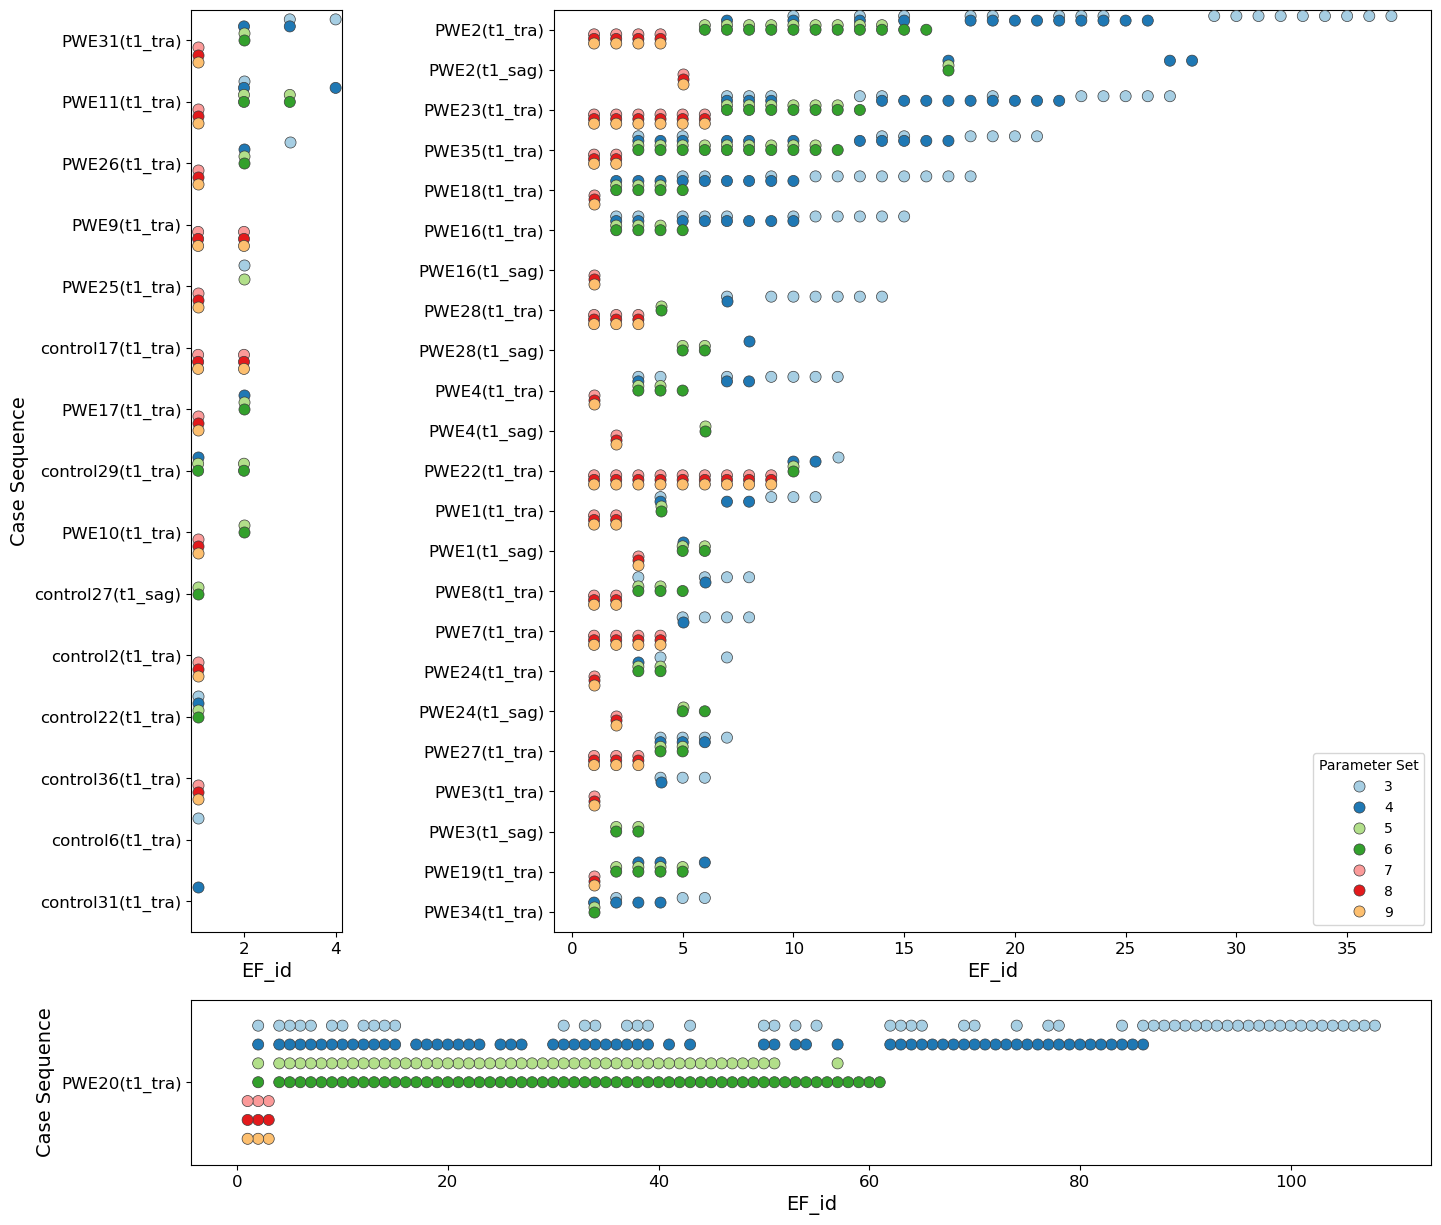

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Set up figure with GridSpec for better control over subplot layout
fig = plt.figure(figsize=(16, 15))
gs = GridSpec(20, 7, figure=fig)  # Define a 20x5 grid

# Define subplot areas with GridSpec
a1 = fig.add_subplot(gs[0:16, 0:1])  # Left main plot
a2 = fig.add_subplot(gs[0:16, 2:7])  # Right main plot
a3 = fig.add_subplot(gs[17:20, :])   # Bottom plot spanning the width

# Create strip plots for each part of the data
sns.stripplot(
    data=part1, x="EF_id", y="case_seq", hue="parameter_set",
    dodge=True, jitter=False, palette="Paired", marker="o", s=8,
    linewidth=.5, ax=a1
)

sns.stripplot(
    data=part2, x="EF_id", y="case_seq", hue="parameter_set",
    dodge=True, jitter=False, palette="Paired", marker="o", s=8,
    linewidth=.5,  ax=a2
)

sns.stripplot(
    data=part3, x="EF_id", y="case_seq", hue="parameter_set",
    dodge=True, jitter=False, palette="Paired", marker="o", s=8,
    linewidth=.5,  ax=a3
)

# Set axis labels and tick parameters with consistent font sizes
for ax in [a1,  a3]:
    ax.set_xlabel("EF_id", fontsize=14)
    ax.set_ylabel("Case Sequence", fontsize=14)
    ax.tick_params(axis='both', labelsize=12)

# Set axis labels and tick parameters with consistent font sizes
for ax in [a2]:
    ax.set_xlabel("EF_id", fontsize=14)
    ax.set_ylabel("", fontsize=2)
    ax.tick_params(axis='both', labelsize=12)

# Adjust legend visibility
legend = a2.legend(loc='lower right')
legend.set_title("Parameter Set")

a1.get_legend().set_visible(False)
a3.get_legend().set_visible(False)

# Improve layout to prevent overlap
plt.tight_layout(h_pad=3)  # Increase horizontal padding between plots

# Save the figure
output_path = 'output/EPE_stat_results/stripplot_params_EF_.png'
plt.savefig(output_path)

# Show the plot
plt.show()


# df.head()

In [53]:
## seperation of cases to make figure better
part1 = df[df['case_seq'].isin(new_order_cases[:28])]
part2 = df[df['case_seq'].isin(new_order_cases[28:])]
part3 = df[df['case_seq'].isin(new_order_cases[28:29])]

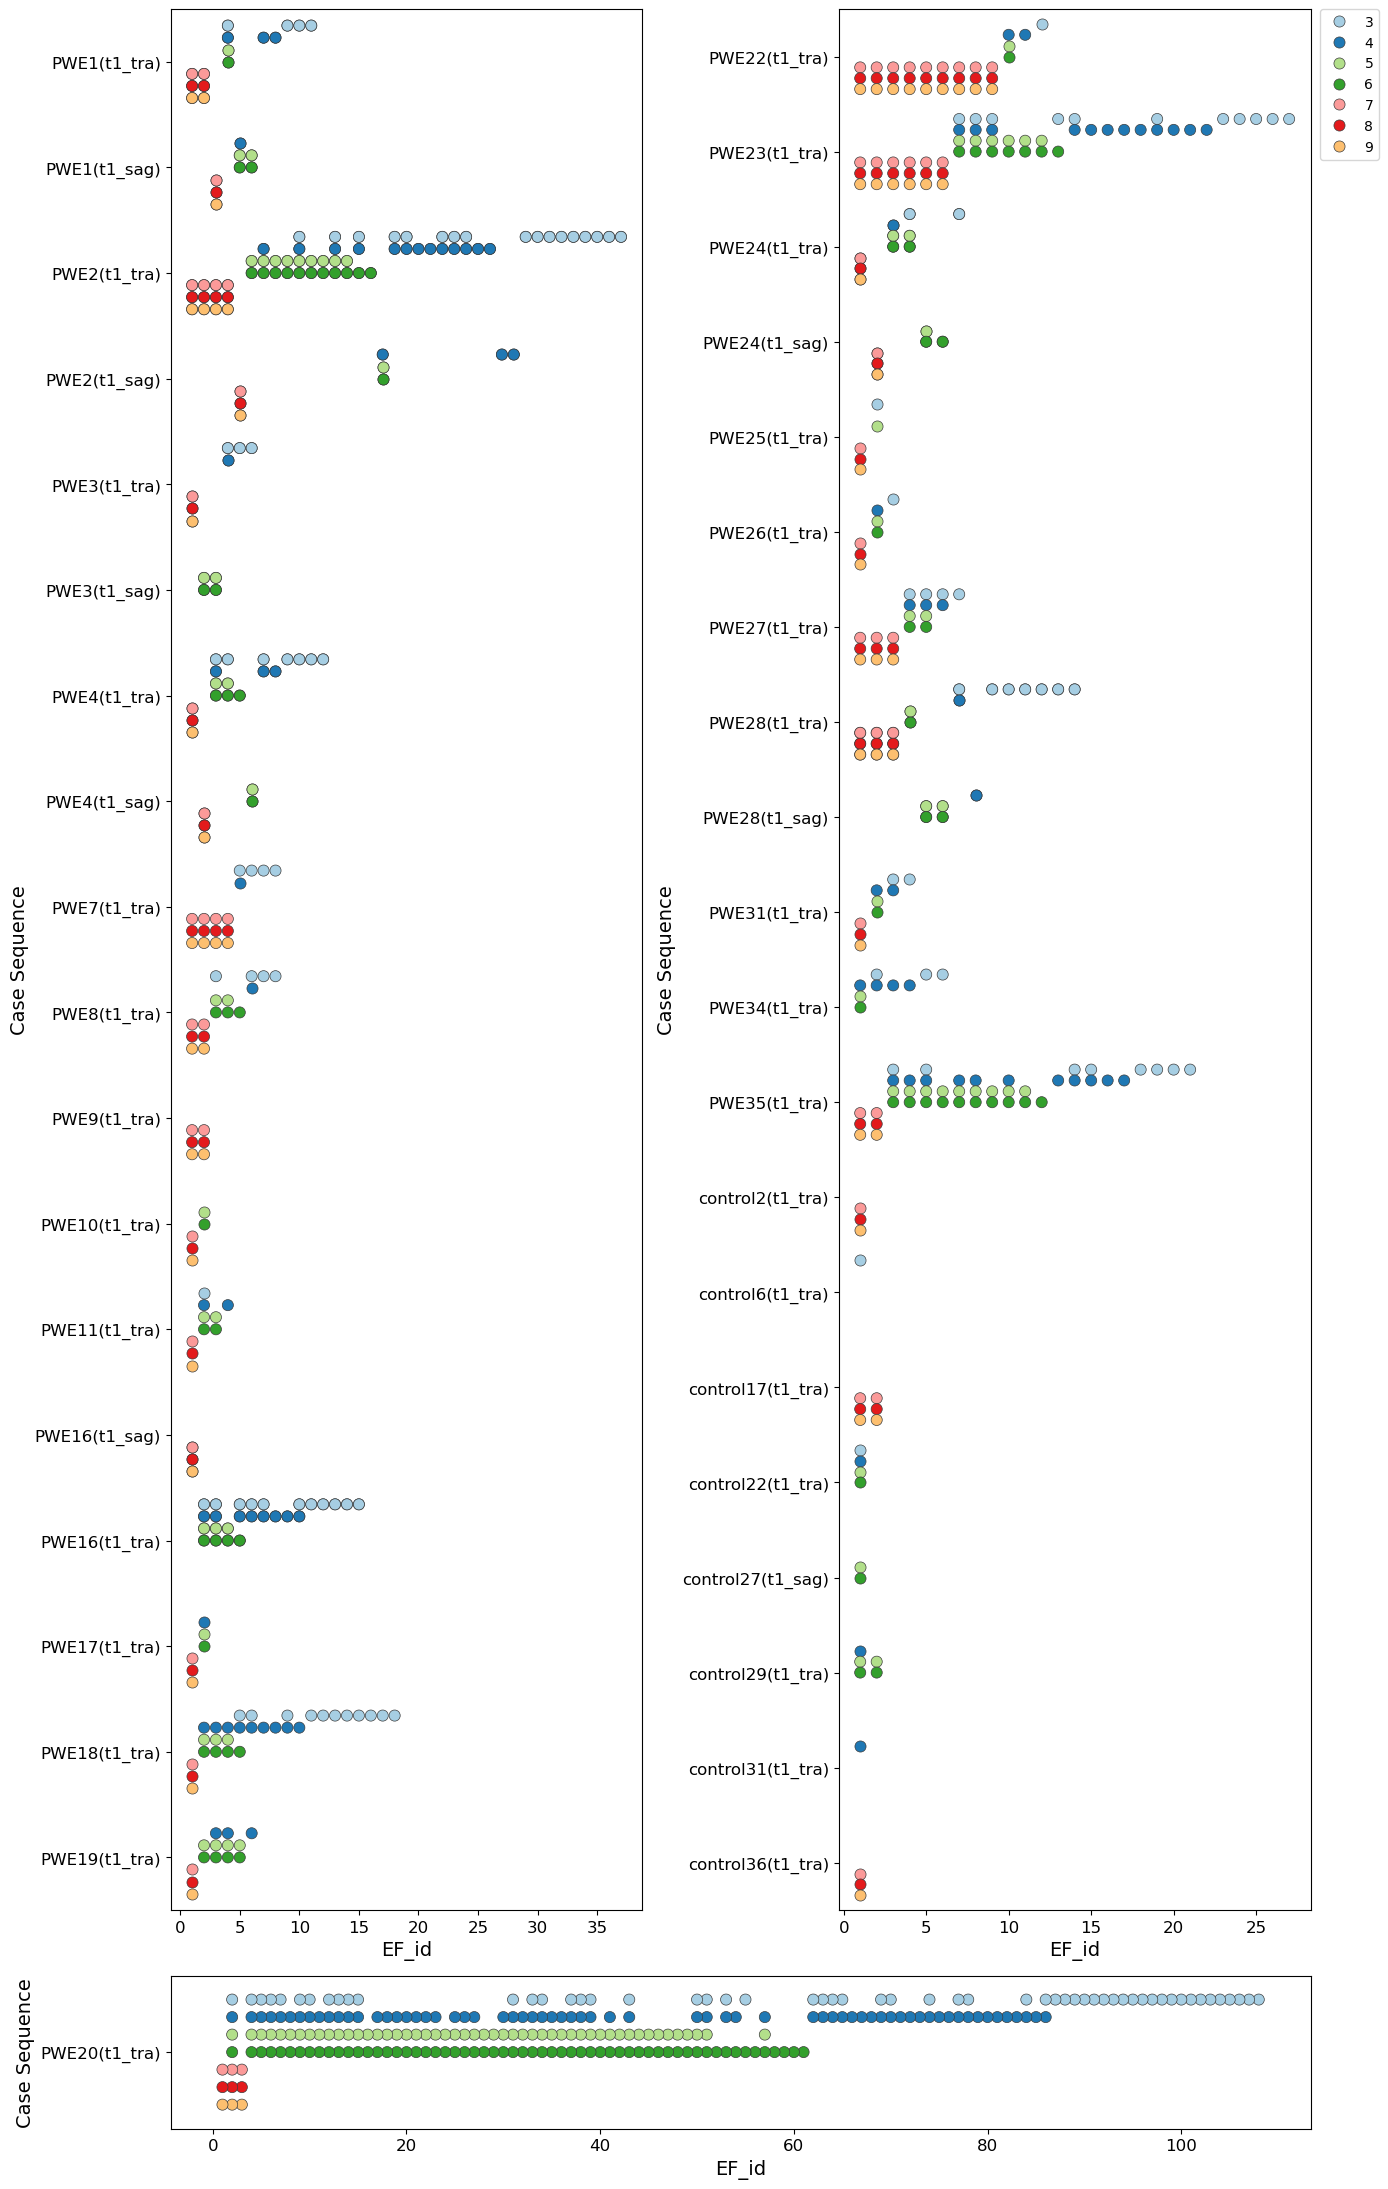

In [54]:
# importing required library

fig = plt.figure(figsize=(14,22))

a1 = plt.subplot2grid((20,6),(0,0), rowspan = 18, colspan = 3)
a2 = plt.subplot2grid((20,6),(0,3), rowspan = 18, colspan = 3)
a3 = plt.subplot2grid((20,6),(18,0), rowspan = 2, colspan = 6)

g1 = sns.stripplot(
    data=part1, x="EF_id", y="case_seq", hue="parameter_set", 
  dodge=True, jitter=False, palette="Paired",  marker="o", s = 8, 
    linewidth=.5, order = new_order_cases[:28],ax = a1
)

sns.stripplot(
    data=part2, x="EF_id", y="case_seq", hue="parameter_set", 
  dodge=True, jitter=False, palette="Paired",  marker="o", s = 8, 
    linewidth=.5, order = new_order_cases[29:],ax = a2
)

sns.stripplot(
    data=part3, x="EF_id", y="case_seq", hue="parameter_set", 
  dodge=True, jitter=False, palette="Paired",  marker="o", s = 8, 
    linewidth=.5, order = new_order_cases[28:29],ax = a3
)


# Adjust font sizes for axis labels and tick labels
a1.set_xlabel("EF_id", fontsize=14)
a1.set_ylabel("Case Sequence", fontsize=14)
a2.set_xlabel("EF_id", fontsize=14)
a2.set_ylabel("Case Sequence", fontsize=14)
a3.set_xlabel("EF_id", fontsize=14)
a3.set_ylabel("Case Sequence", fontsize=14)

# Adjust font sizes for tick labels
a1.tick_params(axis='both', labelsize=12)
a2.tick_params(axis='both', labelsize=12)
a3.tick_params(axis='both', labelsize=12)

a1.get_legend().set_visible(False)
#a2.get_legend().set_visible(False)
a3.get_legend().set_visible(False)

a2.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.tight_layout()

plt.savefig('output/EPE_stat_results/stripplot_params_EF_.png')


plt.show()

/var/folders/4_/rc679g8n36vg743z223qlgfr0000gn/T/ipykernel_2746/1977972096.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)


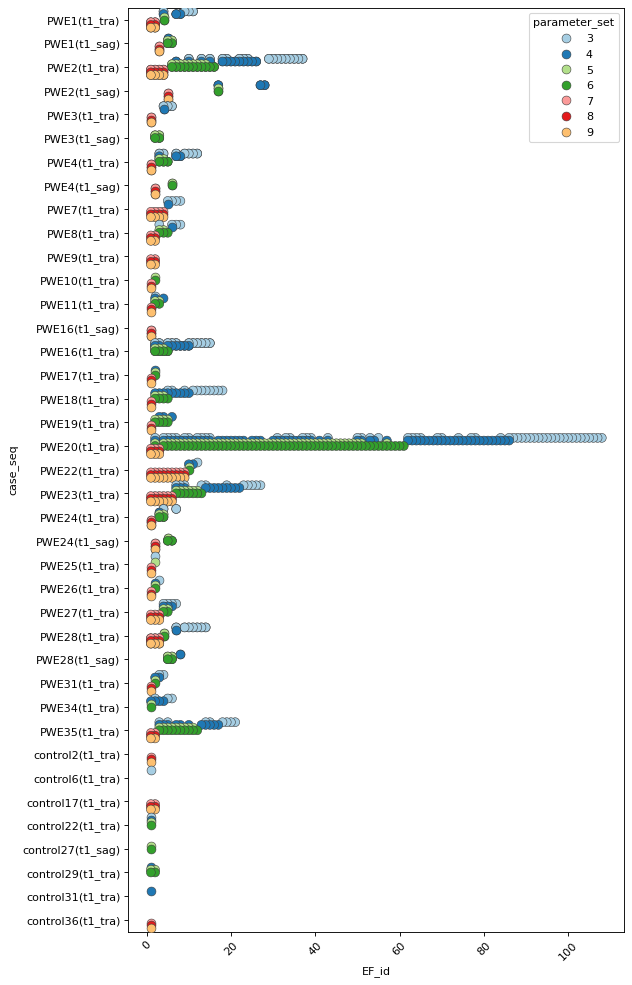

In [55]:
plt.figure(figsize=(8, 15), dpi=80)


g = sns.stripplot(
    data=df, x="EF_id", y="case_seq", hue="parameter_set", 
  dodge=True, jitter=False, palette="Paired",  marker="o", 
    s = 8, linewidth=.5, order = new_order_cases,
)
#g.xaxis.set_ticks_position("top")
g.set_xticklabels(g.get_xticklabels(), rotation=45)

#plt.savefig('output/EPE_stat_results/stripplot_params_EF_.png')
plt.show()

In [57]:
case_matching_df['case_id'] = case_matching_df['case_id'].str.replace('patient', 'PWE', regex=False)
case_matching_df.to_excel('output/case_matching_df_each_data.xlsx')

## create table to show foci numbers per case and per parameter

In [58]:
positive_case_df['EF_number'] = np.zeros((len(positive_case_df)))
positive_case_df=positive_case_df.replace(regex=['patient'],value='PWE')

case_coordinates = {}
for ind in positive_case_df.index:
    if positive_case_df.iloc[ind]['EF_number'] == 0 :
        row = positive_case_df.iloc[ind]
        case_id, coordinates =  row['case_id'], row['coordinates']

        if case_id  not in case_coordinates.keys():
            case_coordinates[case_id] = 1
        else:
            case_coordinates[case_id] += 1
            
        same_coord_index = positive_case_df[(positive_case_df['case_id'] == case_id) & (positive_case_df['coordinates'] == coordinates)].index 
        positive_case_df.loc[same_coord_index,'EF_number'] = case_coordinates[case_id]


In [59]:

ef_table_per_param = positive_case_df[["EF_number", "case_id", "parameter_set"]].sort_values(["EF_number", "case_id", "parameter_set"], ascending=[False, False, False]).groupby(["case_id", "parameter_set"] ).first().reset_index()


In [60]:
ef_table_per_param.head()

,case_id,parameter_set,EF_number
0,PWE1,1,4.0
1,PWE1,2,4.0
2,PWE1,3,11.0
3,PWE1,4,8.0
4,PWE1,5,6.0


In [61]:
ef_table_per_param = ef_table_per_param.pivot_table(values='EF_number', index='case_id', columns='parameter_set')

In [62]:
ef_table_per_param.head()

parameter_set,1,2,3,4,5,6,7,8,9
case_id,,,,,,,,,
PWE1,4.0,4.0,11.0,8.0,6.0,6.0,3.0,3.0,3.0
PWE10,2.0,2.0,NaN,NaN,2.0,2.0,1.0,1.0,1.0
PWE11,3.0,3.0,2.0,4.0,3.0,3.0,1.0,1.0,1.0
PWE16,5.0,3.0,15.0,10.0,4.0,5.0,1.0,1.0,1.0
PWE17,2.0,2.0,NaN,2.0,2.0,2.0,1.0,1.0,1.0


In [63]:
#### rearranging order od cases
indexes_EF_table = list(ef_table_per_param.index)
indexes_EF_table_PWE_num = [int(val.split('PWE')[-1]) for val in indexes_EF_table if 'PWE' in val]
indexes_EF_table_PWE_num.sort()
indexes_PWE = ['PWE' + str(num) for num in indexes_EF_table_PWE_num]

indexes_EF_table_cont_num = [int(val.split('control')[-1]) for val in indexes_EF_table if 'control' in val]
indexes_EF_table_cont_num.sort()
indexes_controls = ['control' + str(num) for num in indexes_EF_table_cont_num]

ef_table_per_param = ef_table_per_param.reindex(indexes_PWE + indexes_controls)

ef_table_per_param.to_excel('output/EPE_stat_results/EPE_selected_features_vs_paramsets_ef_number.xlsx', index=False)

In [64]:
ef_table_per_param

parameter_set,1,2,3,4,5,6,7,8,9
case_id,,,,,,,,,
PWE1,4.0,4.0,11.0,8.0,6.0,6.0,3.0,3.0,3.0
PWE2,20.0,14.0,37.0,28.0,17.0,17.0,5.0,5.0,5.0
PWE3,NaN,NaN,6.0,4.0,3.0,3.0,1.0,1.0,1.0
PWE4,5.0,4.0,12.0,8.0,6.0,6.0,2.0,2.0,2.0
PWE7,NaN,NaN,8.0,5.0,NaN,NaN,4.0,4.0,4.0
PWE8,5.0,4.0,8.0,6.0,4.0,5.0,2.0,2.0,2.0
PWE9,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0
PWE10,2.0,2.0,NaN,NaN,2.0,2.0,1.0,1.0,1.0
PWE11,3.0,3.0,2.0,4.0,3.0,3.0,1.0,1.0,1.0
